In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../segmentation data.csv')
df.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Sex,2000.0,4.570000e-01,0.498272,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Marital status,2000.0,4.965000e-01,0.500113,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Education,2000.0,1.038000e+00,0.599780,0.0,1.000000e+00,1.0,1.000000e+00,3.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0
Occupation,2000.0,8.105000e-01,0.638587,0.0,0.000000e+00,1.0,1.000000e+00,2.0
Settlement size,2000.0,7.390000e-01,0.812533,0.0,0.000000e+00,1.0,1.000000e+00,2.0


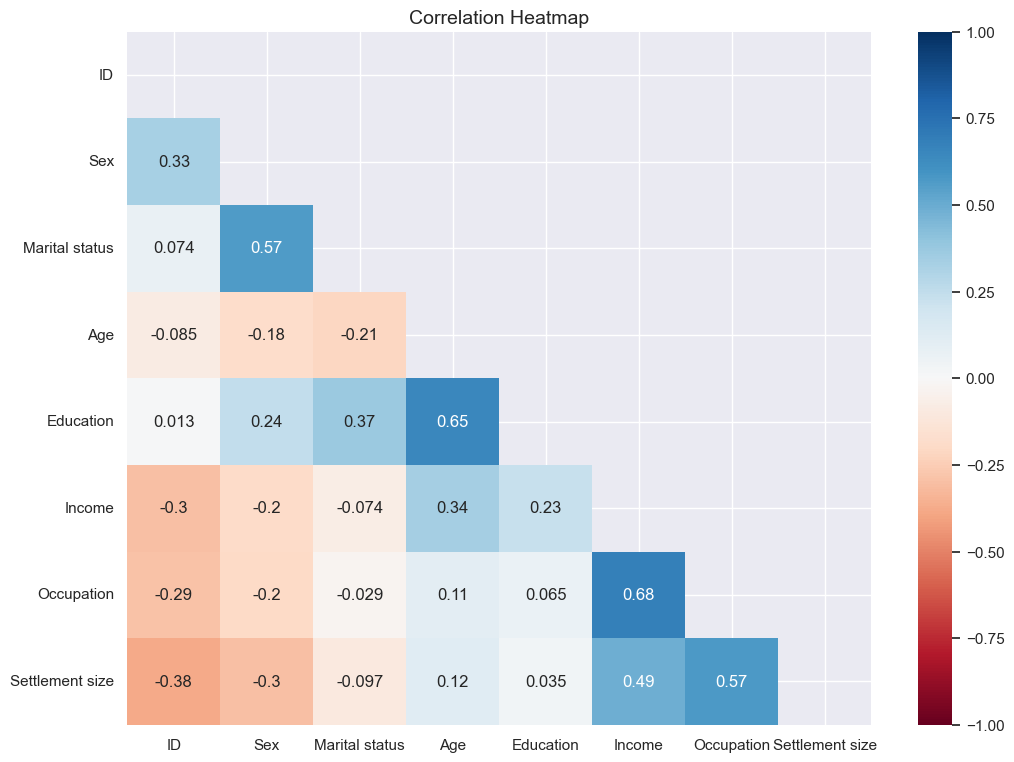

In [5]:
plt.figure(figsize=(12,9))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), vmin=-1, vmax=1, mask=mask, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

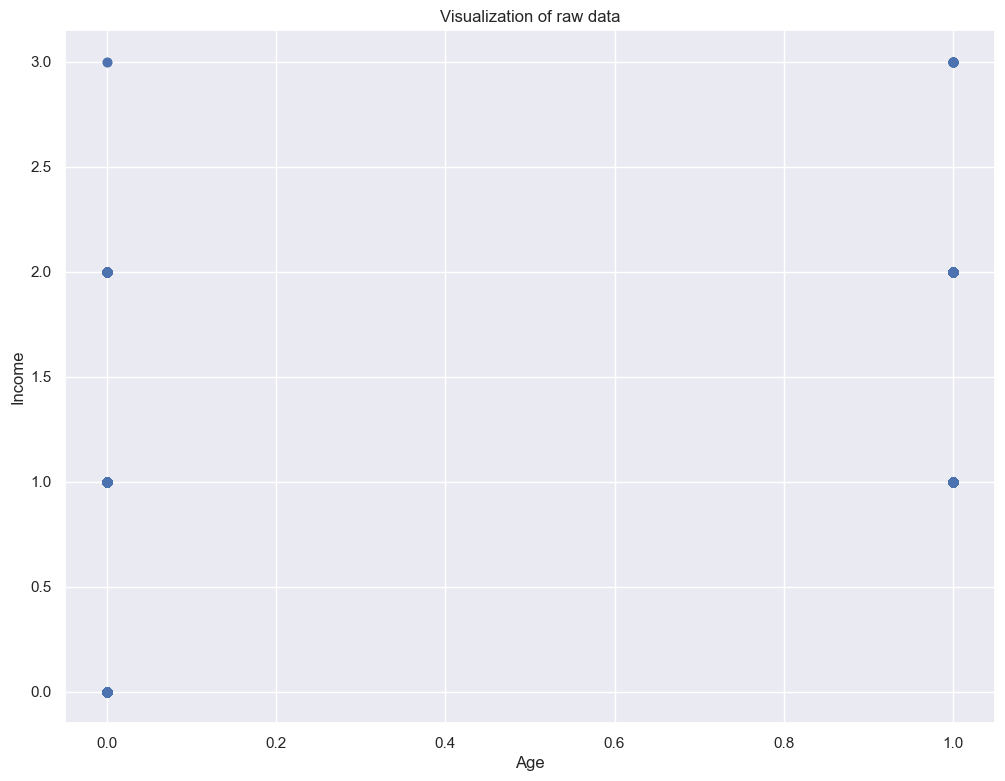

In [6]:
plt.figure(figsize = (12, 9))
plt.scatter(df.iloc[:, 2], df.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

In [7]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [8]:
df_std = pd.DataFrame(data = df_std,columns = df.columns)

In [9]:
pca = PCA()
pca.fit(df_std)

PCA()

In [10]:
pca.explained_variance_ratio_

array([0.34103573, 0.23178599, 0.16650585, 0.09955452, 0.06169548,
       0.04785186, 0.03407515, 0.01749541])

In [11]:
pca.transform(df_std)
scores_pca = pca.transform(df_std)

In [12]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)



C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

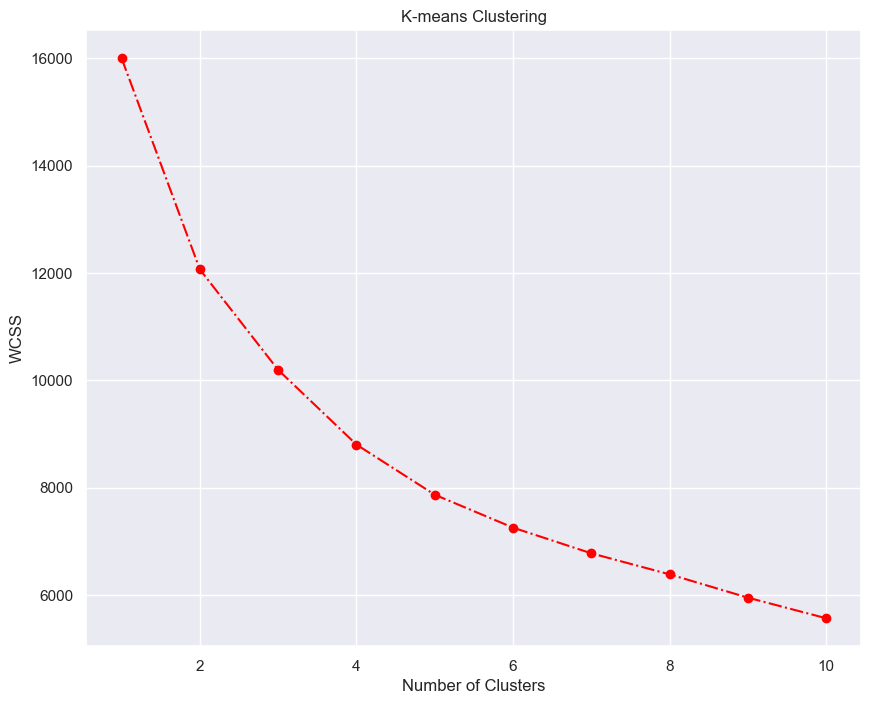

In [13]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [15]:
kmeans.fit(df_std)

C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [16]:
df_segm_kmeans= df_std.copy()
df_std['Segment K-means'] = kmeans.labels_

In [17]:
df_segm_analysis = df_std.groupby(['Segment K-means']).mean()
df_segm_analysis.T

Segment K-means,0,1,2,3
ID,-0.594289,0.216385,-0.233482,0.697055
Sex,-0.853973,0.841696,0.052738,-0.107716
Marital status,-0.632826,1.004079,0.367604,-0.907103
Age,-0.023245,-0.589431,1.704612,-0.104064
Education,-0.500714,0.049608,1.821309,-0.493232
Income,0.503458,-0.403075,0.918041,-0.696787
Occupation,0.690266,-0.282195,0.442394,-0.869527
Settlement size,0.799707,-0.394837,0.417401,-0.836279


In [18]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'}).T

Segment K-means,well-off,fewer-opportunities,standard,career focused
ID,-0.594289,0.216385,-0.233482,0.697055
Sex,-0.853973,0.841696,0.052738,-0.107716
Marital status,-0.632826,1.004079,0.367604,-0.907103
Age,-0.023245,-0.589431,1.704612,-0.104064
Education,-0.500714,0.049608,1.821309,-0.493232
Income,0.503458,-0.403075,0.918041,-0.696787
Occupation,0.690266,-0.282195,0.442394,-0.869527
Settlement size,0.799707,-0.394837,0.417401,-0.836279


Text(0, 0.5, 'Cumulative Explained Variance')

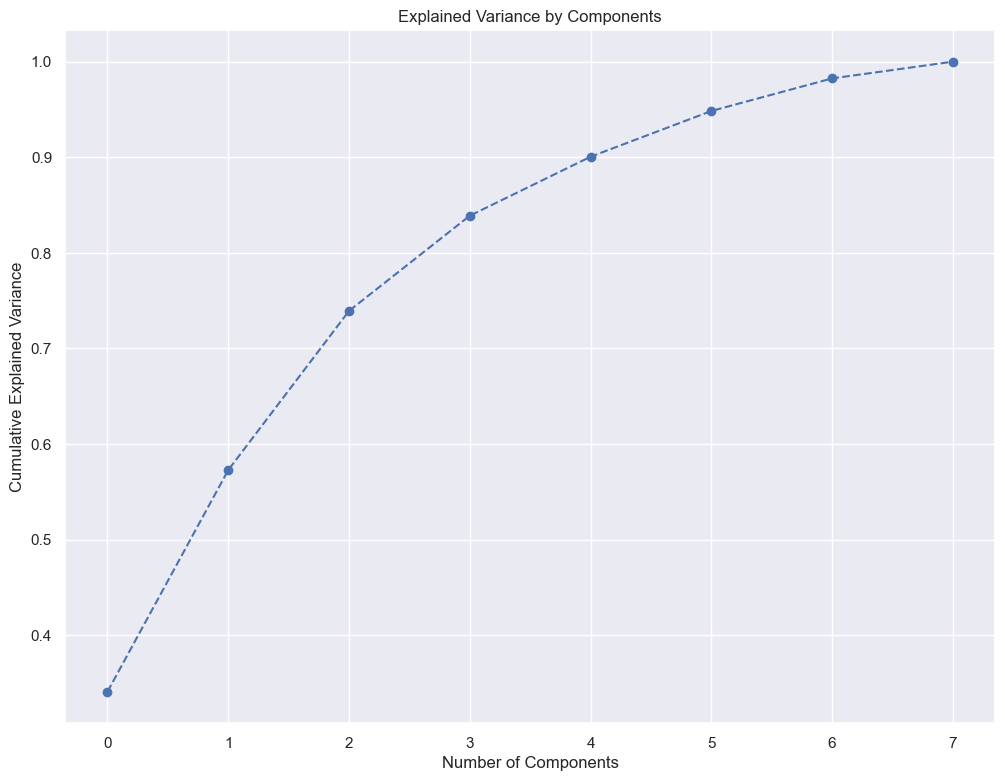

In [22]:
plt.figure(figsize = (12,9))
plt.plot(range(0,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

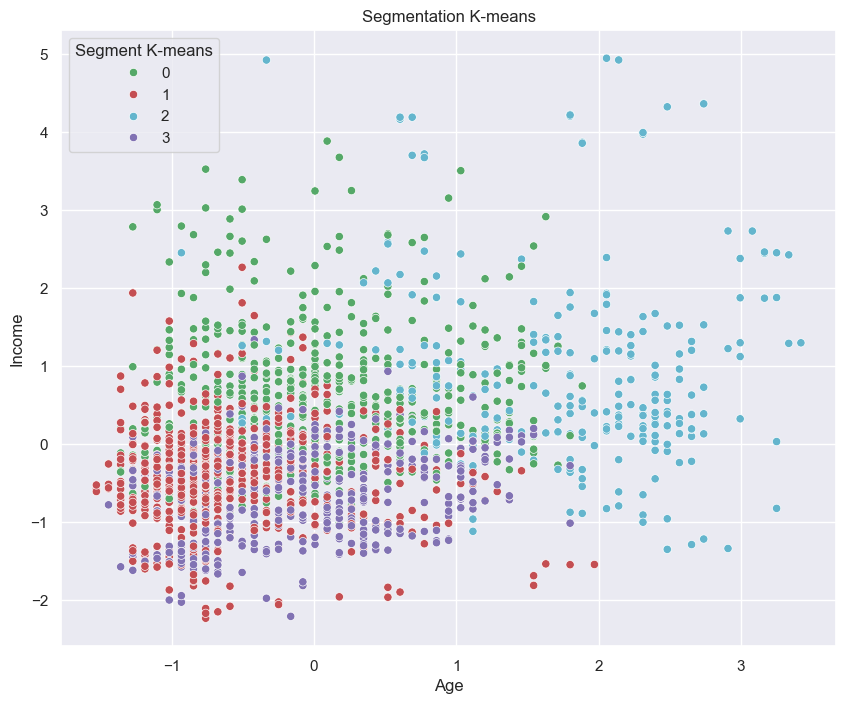

In [26]:
x_axis = df_std['Age']
y_axis = df_std['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_std['Segment K-means'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

sil=[]
kmax=10
for k in range(1,kmax+1):
    kmeans = KMeans(n_clusters = k, n_init=10,init='k-means++').fit(df_std)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_std, kmeans_pca.labels_, metric = 'euclidean'))
    
print(sil)

[0.2522350348999933, 0.2522350348999933, 0.2522350348999933, 0.2522350348999933, 0.2522350348999933, 0.2522350348999933, 0.2522350348999933, 0.2522350348999933, 0.2522350348999933, 0.2522350348999933]
